## Analisi dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
col_names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
             'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
             'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2',
             'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
             'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

dataset = pd.read_csv("data/wdbc.data", names=col_names)
dataset

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Outcome: "Diagnosis" \
Può assumere due valori:
+ Malignant (M) $\rightarrow$ 0
+ Benign (B) $\rightarrow$ 1

In [11]:
dataset['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

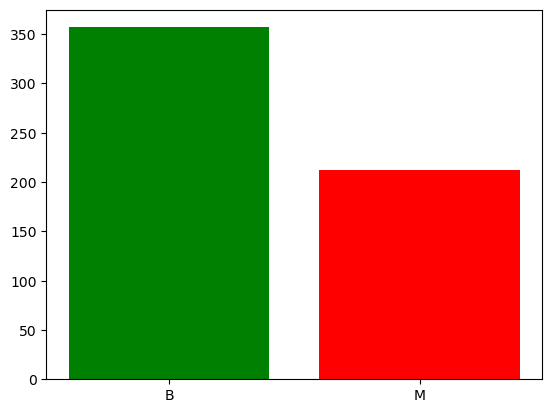

In [12]:
plt.bar(dataset['Diagnosis'].value_counts().index, dataset['Diagnosis'].value_counts().values, color=['green', 'red'])
plt.show()

In [13]:
# eliminare la colonna ID
dataset = dataset.drop(['ID'], axis=1)

# convertire valori binari della feature Diagnosis
# B -> 0
# M -> 1
dataset['Diagnosis'] = dataset['Diagnosis'].map({'B': 0, 'M': 1})

In [14]:
dataset.to_csv("data/data.csv", index=False)

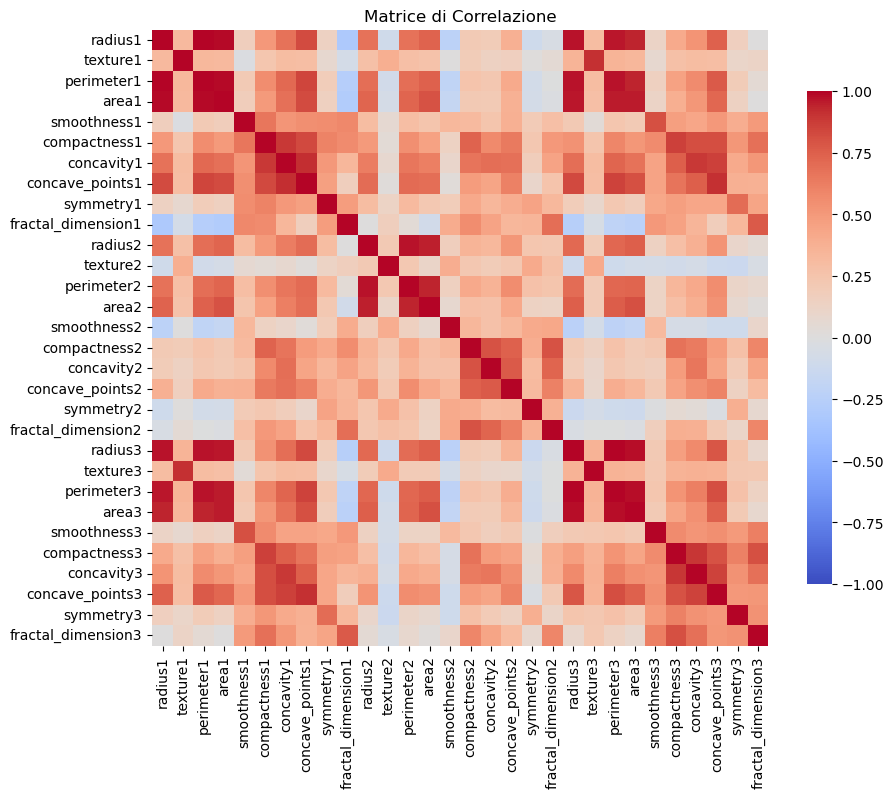

In [15]:
# Calcola la matrice di correlazione
dataset = dataset.drop(['Diagnosis'], axis=1)
correlation_matrix = dataset.corr()

# Crea la heatmap
plt.figure(figsize=(10, 8))  # Dimensioni del grafico
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1, square=True, fmt=".2f", cbar_kws={"shrink": .8})

# Mostra la matrice di correlazione
plt.title("Matrice di Correlazione")
plt.show()